# Logistic Regression

The first part will deal with the theoretical foundations of logistic regression. The second part shows its application on the MNIST dataset.

## Theoretical background 

Logistic regression is a method for (binary) classification. The name regression therefore is a bit confusing. The reason why it is a regression is that it calculates the probability of falling into a class. The corner stone of logistic regression is the so called sigmoid function:

\begin{equation*}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation*}

The properties of $\sigma$ are:

* $z \rightarrow \infty$, then $\sigma \rightarrow 1$
* $z \rightarrow -\infty$, then $\sigma \rightarrow 0$.

In logistic regression $z = \Theta \cdot x$, where $\Theta$ is the parameter vector while $x$ is the input vector (the collection of features). Then the interpretation of the sigmoid is a probability:

\begin{align}
P(y=1|x;\Theta) &= \sigma_\Theta(x) \\
P(y=0,x;\Theta) &= 1 - \sigma_\Theta(x)
\end{align}

After that the probability of a $y$ value if x is the input and $\Theta$ is a fixed parameter in the model:

\begin{equation*}
P(y|x;\Theta) = \sigma_\Theta(x)^y \left( 1 - \sigma_\Theta(x) \right)^{(1-y)}
\end{equation*}

Then, for the whole training set $\left( \underline{y}, \underline{x} \right)$ the probability:

\begin{equation*}
P(\underline{y}|\underline{x};\Theta) = \Pi_{i=1}^n{\sigma_\Theta(x_i)^{y_i} \left( 1 - \sigma_\Theta(x_i) \right)^{(1-y_i)}}
\end{equation*}

where $y_i$ is the $i^{th}$ training sample's label (0 or 1). The goal is to choose a $\Theta$ for which this probability achieves its maximum. That means that according to the chosen parameters the training set is the most probable configuration but we know (or at least assume) that the training set is correct. Therefore its probability should be 1 according to an ideal model. Unfortunately, the logistic regression model can not express any type of relationship between $x$ and $y$.

The goal of training:

\begin{equation*}
\Theta^* = argmax_\Theta (P(\underline{y}|\underline{x};\Theta))
\end{equation*}

We can take the logarithm of the probability because the logarithm function is strictly monoton therefore the maximum remains at the same place but the problem will be easier:

\begin{equation*}
J(\Theta) = log P(\underline{y}|\underline{x};\Theta) = \sum_{i=1}^n{y_i log \sigma_\Theta(x) + (1-y_i)log\left( 1 - \sigma_\Theta(x) \right)}
\end{equation*}

To find the maximum we can use a gradient ascend method. To use a gradient method we need to calculate the gradient:

\begin{equation*}
\nabla_\Theta J(\Theta) = \sum_{i=1}^n{\left( y_i - \sigma_\Theta(x_i) \right) x_i}
\end{equation*}

For the derivation it is useful to take into account that the derivative of the sigmoid function:

\begin{equation*}
\frac{\partial}{\partial \Theta}\sigma_\Theta(x) = \sigma_\Theta(x)\left( 1 - \sigma_\Theta(x) \right) x
\end{equation*}

Then the update rule for $\Theta$:

\begin{equation*}
\Theta_{t+1} = \Theta_t + \alpha \nabla_\Theta J(\Theta)|_{\Theta=\Theta_t}
\end{equation*}

During the example the optimization will use batches from the training set to avoid the huge computation cost. This is a stochastic gradient ascent. 

## Logistic regression on MNIST

In [1]:
from pckutils import mnist
from logistic_regression import logic
import numpy as np
from matplotlib import pyplot as plt
import os

### Shape of sigmoid and its derivative

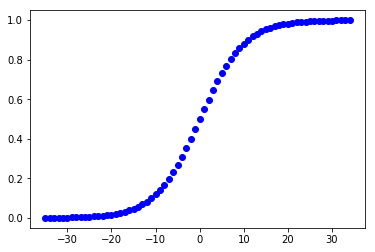

In [2]:
# plotting the sigmoid function
theta = 1.0
xs = [t for t in range(-35, 35)]
ys = []
for x in xs:
    y = logic.sigmoid(theta, x/5)
    ys.append(y)

plt.plot(xs, ys, 'bo')
plt.show()

It can be seen that the left tail goes to 0.0 while the right tail goes to 1.0.

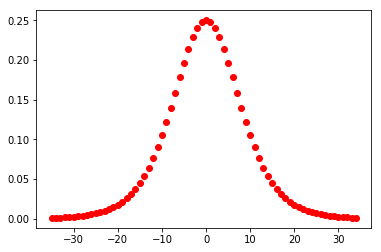

In [3]:
ys_comma = []
for x in xs:
    sigmoid = logic.sigmoid(theta, x/5)
    y = sigmoid * (1 - sigmoid)
    ys_comma.append(y)

plt.plot(xs, ys_comma, 'ro')
plt.show()

### Loading MNIST data

In [4]:
url_train_image = "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
url_train_label = "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
url_test_image = "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz"
url_test_label = "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"

In [5]:
# download packages if it was not downloaded
train_imgs_file_name = "data/training_mnist_imgs.gz"
train_lbls_file_name = "data/training_mnist_lbls.gz"
test_imgs_file_name = "data/test_mnist_imgs.gz"
test_lbls_file_name = "data/test_mnist_lbls.gz"

# checking if a file exists
train_I = os.path.exists(train_imgs_file_name)
train_L = os.path.exists(train_lbls_file_name)
test_I = os.path.exists(test_imgs_file_name)
test_L = os.path.exists(test_lbls_file_name)

if not train_I:
    mnist.download(url_train_image, train_imgs_file_name)
    mnist.unzip(train_imgs_file_name)
    print("train_I done.")
    
if not train_L:
    mnist.download(url_train_label, train_lbls_file_name)
    mnist.unzip(train_lbls_file_name)
    print("train_L done.")
    
if not test_I:
    mnist.download(url_test_image, test_imgs_file_name)
    mnist.unzip(test_imgs_file_name)
    print("test_I done.")
    
if not test_L:
    mnist.download(url_test_label, test_lbls_file_name)
    mnist.unzip(test_lbls_file_name)
    print("test_L done.")

train_L done.
test_I done.
test_L done.


In [6]:
# load in the images and labels
train_imgs_file_name = "data/training_mnist_imgs.mnist"
train_lbls_file_name = "data/training_mnist_lbls.mnist"
test_imgs_file_name = "data/test_mnist_imgs.mnist"
test_lbls_file_name = "data/test_mnist_lbls.mnist"

# training images
mgb, num_train_imgs, rows, cols, x_train_s = mnist.read_img(train_imgs_file_name)
assert mgb == 2051, "Wrong magic number when training images were loaded!"

# training labels (number of labels are the same as number of images)
mgb, _, y_train_s = mnist.read_label(train_lbls_file_name)
assert mgb == 2049, "Wrong magic number when training labels were loaded!"

# test images (test image size is the same)
mgb, num_test_imgs, _, _, x_test_s = mnist.read_img(test_imgs_file_name)
assert mgb == 2051, "Wrong magic number when test images were loaded!"

# test labels
mgb, _, y_test_s = mnist.read_label(test_lbls_file_name)
assert mgb == 2049, "Wrong magic number when test labels were loaded!"

2051 60000 28 28
Reading images: [100%]
2049 60000
Reading labels: [100%]
2051 10000 28 28
Reading images: [100%]
2049 10000
Reading labels: [100%]


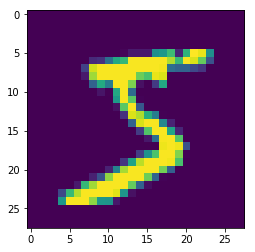

The corresponding digit: 5


In [7]:
# show an example from the dataset
mnist.show_handwritten_digit(x_train_s[0], rows, cols)
print("The corresponding digit: %d" %int(y_train_s[0]))

### Choosing the images with 0s and 1s

We want a binary classification problem therefore we should find and collect the images and labels with 0 or 1.

In [8]:
# First define a helper function.
# Collecting indices then separating the corresponding images.
def find_0s_1s(images, labels): # images and labels are lists with the same length
    indices = []
    for idx, label in enumerate(labels):
        if label == 0 or label == 1:
            indices.append(idx)
            
    images_01 = []
    labels_01 = []
    for idx in indices:
        images_01.append(images[idx])
        labels_01.append(labels[idx])
    return images_01, labels_01

In [9]:
# training set
x_train_01, y_train_01 = find_0s_1s(x_train_s, y_train_s)

In [10]:
# test set
x_test_01, y_test_01 = find_0s_1s(x_test_s, y_test_s)

In [11]:
# calculate some properties of the new data set
num_train_imgs = len(x_train_01)
num_test_imgs = len(x_test_01)
print(num_train_imgs, num_test_imgs)

12665 2115


### Doing the regression

In [12]:
# parameters
data = (x_train_01, y_train_01)
lr = 0.001
max_iter = 50
batch_size = 1024
epoch = 4
split_ratio=0.95

In [13]:
# fitting
theta, train_e, test_e = logic.logistic_regression(data, lr, max_iter, batch_size, epoch=epoch, split_ratio=split_ratio, verbose=True)

D:\AI\learning\DeepLearningTutorial\logistic_regression\logic.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Iterating: [100%]


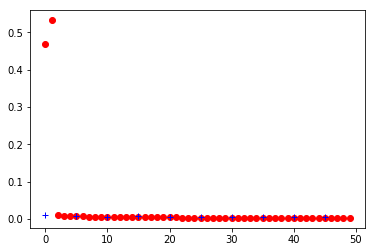

In [14]:
# reporting learning curve
plt.figure(1)
x_axis_train = [x for x in range(len(train_e))]
x_axis_test = [x * len(train_e)//len(test_e) for x in range(len(test_e))]
plt.plot(x_axis_train, train_e, 'ro', x_axis_test, test_e, 'b+')
plt.show()

The error rate: 0.05%


D:\AI\learning\DeepLearningTutorial\logistic_regression\logic.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


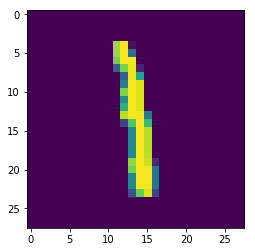

Predicted: 1
Correct: 1


In [15]:
# calculating error rate on the test set
errors = 0.0
for x, y in zip(x_test_01, y_test_01):
    if logic.predict(theta, x) != y:
        errors += 1.0

error_rate = errors/num_test_imgs * 100.0
print('The error rate: %.2f%%' %error_rate)

idx = 8
x = x_test_01[idx]
mnist.show_handwritten_digit(x, 28, 28)
print("Predicted: %d" %logic.predict(theta, x))
print("Correct: %d" %y_test_01[idx])

### Summary

Such a simple method then logistic regression was able to perform very well on the MNIST data set. This is because we only took into account the 0s and 1s but nothing else. Differentiating a 0 and 1 can be easy. It is worthy to try with more similar digits. 